In [4]:
import numpy as np 
import pandas as pd  
import matplotlib.pylab as plt
import seaborn as sns  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [6]:
df.shape

(200, 5)

In [7]:
df.tail(25)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
175,176,Female,30,88,86
176,177,Male,58,88,15
177,178,Male,27,88,69
178,179,Male,59,93,14
179,180,Male,35,93,90
180,181,Female,37,97,32
181,182,Female,32,97,86
182,183,Male,46,98,15
183,184,Female,29,98,88
184,185,Female,41,99,39


In [8]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

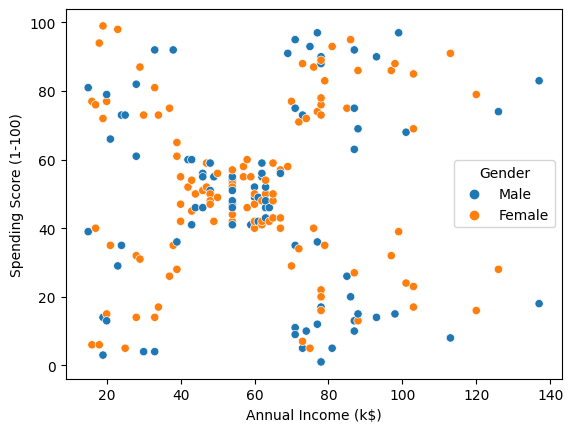

In [9]:
sns.scatterplot(x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                hue = 'Gender',data = df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

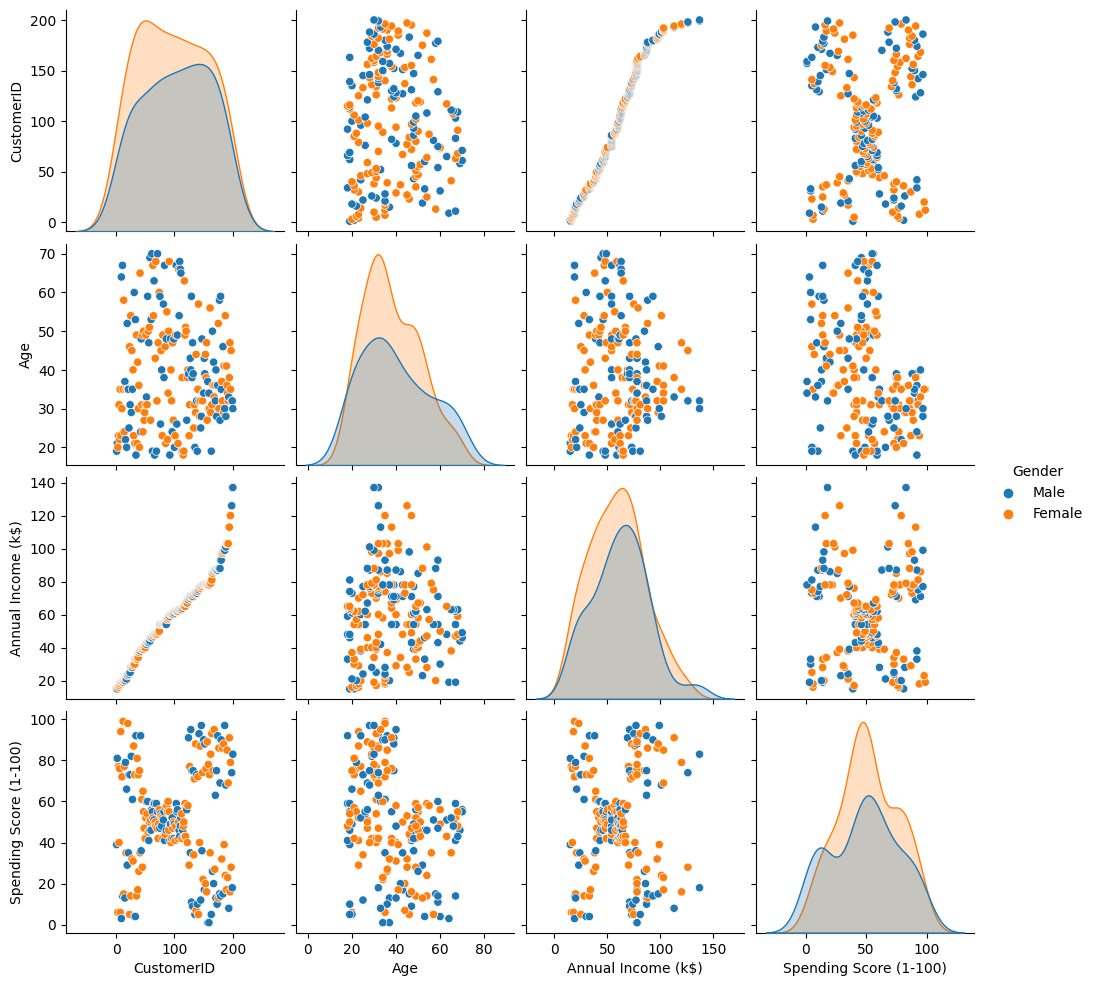

In [10]:
sns.pairplot(df, hue="Gender")

### Verifica-se a partir dos gráficos scatteplot que não existe diferença signficativa entre generos nesse dataset, pois em relação ao genero, os dados estão igualmente distribuidos


In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
df_cluster = df[['Annual Income (k$)','Spending Score (1-100)']].copy()

In [13]:
df_cluster

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
inertia = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

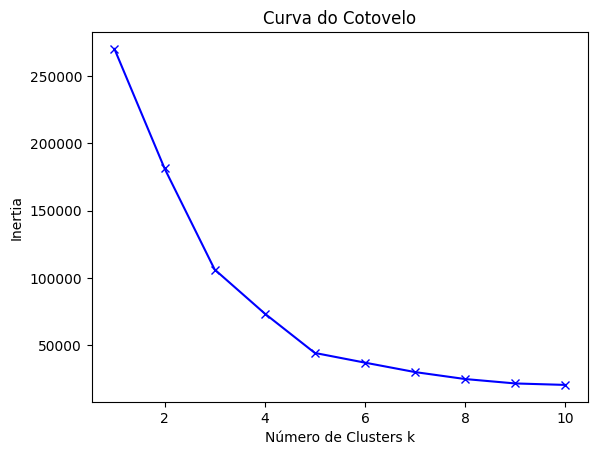

In [15]:
plt.plot(k_values,inertia,'bx-')
plt.xlabel('Número de Clusters k')
plt.ylabel('Inertia')
plt.title('Curva do Cotovelo')
plt.show()

### Com base na curva do cotevelo percebe-se que até k igual a 5 tem-se uma queda considerável na variação dentro do cluster e, depois disso a curva fica constante.

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_cluster)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [17]:
df_cluster['Cluster'] = kmeans.labels_

In [18]:
centroids = kmeans.cluster_centers_

In [19]:
df_cluster.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'], dtype='object')

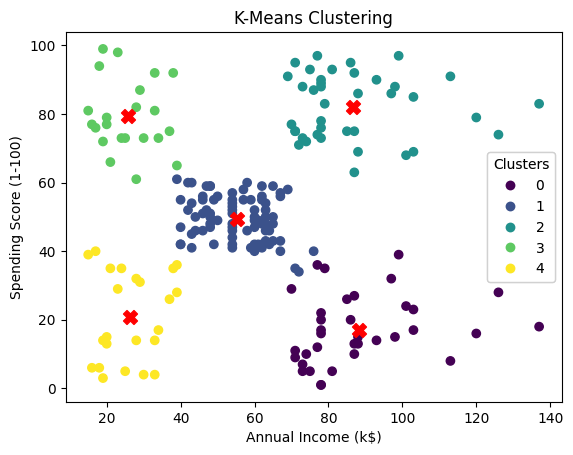

In [20]:
scatter = plt.scatter(df_cluster['Annual Income (k$)'], df_cluster['Spending Score (1-100)'], c=df_cluster['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X')  
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()


In [21]:
silhouette_avg = silhouette_score(df_cluster, df_cluster['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5546560774988492


In [22]:
print(centroids)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


### Baseado no gráfico, seria viável direcionar campanhas de marketing para o cluster 0, que representa pessoas com alta renda anual, porém que ainda possuem baixo spending score. Com isso, as campanhas seriam voltadas para convencer esse grupo a comprar mais produtos. 
### Ainda, campanhas voltadas para o cluster 2, pessoas com alto annual income e alto spending score, esse grupo representa o grupo com maior lucratividade. Para esse grupo seria interessante direcionar campanhas de produtos de alto preço.